# Practical Question (40 Marks)
Task:
You are required to conduct an extensive data analysis and visualization project using Pandas for data manipulation and Matplotlib's Pyplot for data visualization. The dataset to be used is available on Kaggle, and you are expected to perform the analysis on the Jupyter Notebook

Dataset:
Dataset Name: House Prices - Advanced Regression Techniques

File to Use: train.csv(download from kaggle)

### import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

### 1. Data Loading and Initial Exploration (5 Marks)
- Load the dataset into your jupyter notebook environment and display the first 10 rows.
- Provide a summary of the dataset, including the number of rows, columns, and data types of each column.
- Identify and display the columns that contain missing values and the percentage of missing values for each.

In [2]:
data=pd.read_csv('train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
# dimensions of each data
print(f' The data has {data.shape[0]} rows  and {data.shape[1]} columns')

 The data has 1460 rows  and 81 columns


In [4]:
# data type of each column
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
# missing values
missing_pct=(data.isna().sum()/data.shape[0])*100
missing_pct[missing_pct>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

### 2. Data Cleaning and Preprocessing (15 Marks)
- Handle missing values:
    - For numerical columns, impute missing values using the median of the respective column.
    - For categorical columns, impute missing values using the most frequent value (mode) or drop the columns if the missing values exceed 50%.
    - Justify your choice of imputation strategy for both numerical and categorical columns.
- Convert categorical variables to numerical:
    - Use one-hot encoding for all categorical columns with fewer than 10 unique values.
    - Use label encoding for categorical columns with more than 10 unique values.
    - Identify and remove any duplicate rows in the dataset.

In [6]:
# select numeric and categorical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [7]:
num_data=data[numeric_cols]
num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
# impute missing values for numerical columns with median
df_num=num_data.copy()
for col in numeric_cols:
    df_num[col].fillna(df_num[col].median())

In [9]:
df_num.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:
cat_data=data[categorical_cols]
cat_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
# for categorical columns
df_cat = cat_data.copy()

for col in categorical_cols:
    missing_percentage = df_cat[col].isnull().mean() * 100
    if missing_percentage > 50:
        df_cat.drop(columns=[col], inplace=True)
    else:
        df_cat[col] = df_cat[col].fillna(df_cat[col].mode()[0])

In [12]:
df_cat.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

##### Justification
- Median is robust to outliers compared to mean hence a better representation of the central tendency when data is skewed. Median also helps maintain the distribution of data.
- Mode is the most frequent value. It preserves the existing distribution of categories. Dropping columns with greater than 50% missing values avoids introducing excessive bias.

In [13]:
cat_cols=df_cat.columns

In [14]:
# columns with fewer than 10 unique values
cols_low_unique=[]
for col in cat_cols:
    if df_cat[col].nunique()<10:
        cols_low_unique.append(col)
df_cat_low=df_cat[cols_low_unique]
df_cat_low.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [15]:
# one-hot encoding
df_cat1 = pd.get_dummies(df_cat_low, columns=cols_low_unique, drop_first=True)
df_cat_1 = df_cat1.astype(int)
df_cat_1.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [16]:
# columns with more than 10 unique values
cols_high_unique=[]
for col in cat_cols:
    if df_cat[col].nunique()>10:
        cols_high_unique.append(col)
df_cat_high=df_cat[cols_high_unique]
df_cat_high.head()

,Neighborhood,Exterior1st,Exterior2nd
0,CollgCr,VinylSd,VinylSd
1,Veenker,MetalSd,MetalSd
2,CollgCr,VinylSd,VinylSd
3,Crawfor,Wd Sdng,Wd Shng
4,NoRidge,VinylSd,VinylSd


In [17]:
# label encoding
df_cat_2=df_cat_high.copy()
label_enc = LabelEncoder()
for col in cols_high_unique:
    df_cat_2[col] = label_enc.fit_transform(df_cat_high[col])

In [18]:
df_cat_2.head()

,Neighborhood,Exterior1st,Exterior2nd
0,5,12,13
1,24,8,8
2,5,12,13
3,6,13,15
4,15,12,13


In [19]:
# combine the datasets
df_clean = pd.concat([df_num, df_cat_2, df_cat_1], axis=1).drop_duplicates()
df_clean

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,1,0,0,0,1,0


### 3. Exploratory Data Analysis (EDA) (10 Marks)
- Compute and display the correlation matrix for all numerical features.
- Identify and discuss the top 10 features that are most positively and negatively correlated with the target variable SalePrice.
- Perform a group analysis:
    - Group the data by Neighborhood and compute the mean, median, and standard deviation of SalePrice for each neighborhood. Display the top 5 neighborhoods with the highest and lowest mean SalePrice.
    - Group the data by OverallQual and YearBuilt, and calculate the mean SalePrice. Comment on any patterns or trends you observe.

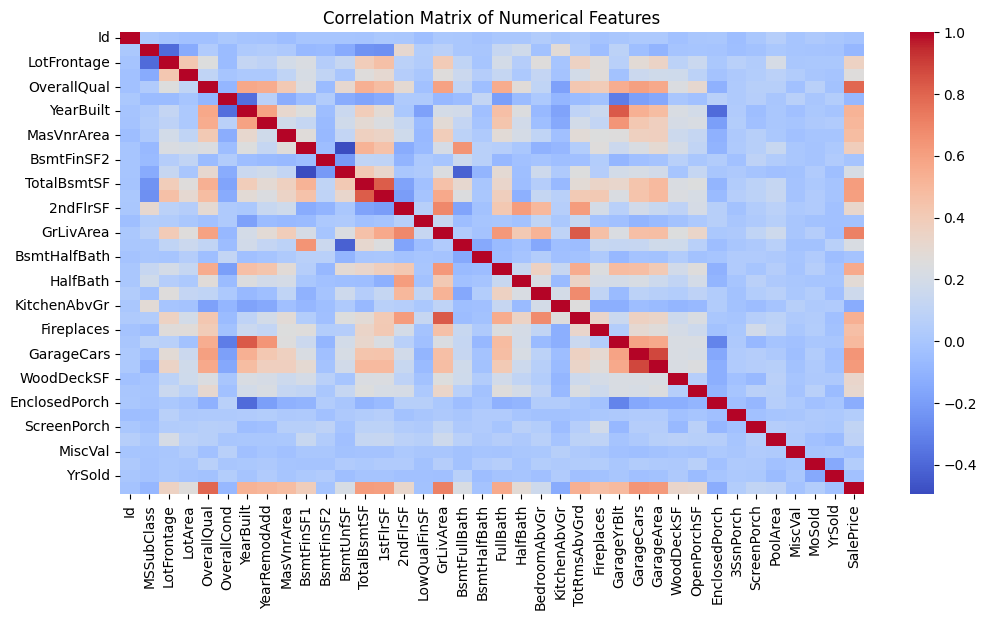

In [20]:
# compute correlation matrix
corr_matrix = df_num.corr()

# Display correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show();

In [21]:
# correlation of all features with SalePrice
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
saleprice_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [22]:
# top 10 +vely correlated features
top_10_pos = saleprice_corr.drop('SalePrice').head(10)
top_10_pos

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [23]:
# top 10 -vely correlated features
top_10_neg = saleprice_corr.tail(10)
top_10_neg

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [24]:
# 10 features that are most positively and negatively correlated
print('Top 10 +vely correlated with SalePrice')
print(top_10_pos)

print('\nTop 10 -vely correlated with SalePrice')
print(top_10_neg)

Top 10 +vely correlated with SalePrice
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Top 10 -vely correlated with SalePrice
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [25]:
# group by neighborhood
neighborhood_stats = df_clean.groupby('Neighborhood')['SalePrice'].agg(['mean','median','std'])
neighborhood_stats

,mean,median,std
Neighborhood,,,
0,194870.882353,191000.0,30393.229219
1,137500.000000,137500.0,19091.883092
2,104493.750000,106000.0,14330.176493
3,124834.051724,124300.0,40348.689270
4,212565.428571,200250.0,50231.538993
5,197965.773333,197200.0,51403.666438
6,210624.725490,200624.0,68866.395472
7,128219.700000,121750.0,43208.616459
8,192854.506329,181000.0,35986.779085


In [26]:
# top 5 highest mean for SalePrice
top_5_highest = neighborhood_stats.sort_values('mean', ascending=False).head(5)
top_5_highest

,mean,median,std
Neighborhood,,,
15,335295.317073,301500.0,121412.658640
16,316270.623377,315000.0,96392.544954
22,310499.000000,278000.0,112969.676640
23,242247.447368,228475.0,64845.651549
24,238772.727273,218000.0,72369.317959


In [27]:
# top 5 lowest mean for SalePrice
top_5_lowest = neighborhood_stats.sort_values('mean', ascending=True).head(5)
top_5_lowest

,mean,median,std
Neighborhood,,,
10,98576.470588,88000.0,23491.049610
9,100123.783784,103000.0,33376.710117
2,104493.750000,106000.0,14330.176493
3,124834.051724,124300.0,40348.689270
7,128219.700000,121750.0,43208.616459


In [28]:
# Group by OverallQual and YearBuilt
qual_year_stats = df_clean.groupby(['OverallQual','YearBuilt'])['SalePrice'].mean().reset_index()
qual_year_stats

,OverallQual,YearBuilt,SalePrice
0,1,1922,61000.000000
1,1,1946,39300.000000
2,2,1920,60000.000000
3,2,1936,60000.000000
4,2,1949,35311.000000
...,...,...,...
368,10,2003,386250.000000
369,10,2006,413760.000000
370,10,2007,331916.666667
371,10,2008,369237.500000


In [29]:
# put in long format, pivot for visualization
qual_year_pivot = qual_year_stats.pivot(index='YearBuilt', columns='OverallQual', values='SalePrice')
qual_year_pivot.head()

OverallQual,1,2,3,4,5,6,7,8,9,10
YearBuilt,,,,,,,,,,
1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122000.0,NaN,NaN
1875,NaN,NaN,NaN,NaN,94000.0,NaN,NaN,NaN,NaN,NaN
1880,NaN,NaN,NaN,NaN,124000.0,117500.0,280489.5,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168000.0,NaN,NaN
1885,NaN,NaN,NaN,111250.0,NaN,NaN,NaN,NaN,NaN,NaN


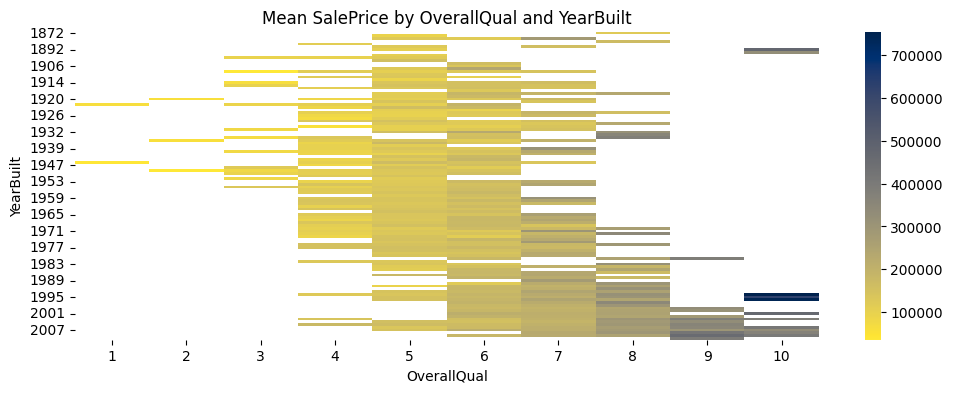

In [30]:
# visualize

plt.figure(figsize=(12,4))
sns.heatmap(qual_year_pivot, cmap='cividis_r')
plt.title('Mean SalePrice by OverallQual and YearBuilt')
plt.xlabel('OverallQual')
plt.ylabel('YearBuilt')
plt.show();

#### comment
- The houses with 8 or higher OverallQual have consistent higher prices over the years
- Also, newly build year shows highest sale price

### 4. Data Visualization (10 Marks)
- Visualize the distribution of the SalePrice using a histogram. Comment on the distribution shape and any potential skewness.
- Plot a scatter plot to visualize the relationship between GrLivArea (Ground Living Area) and SalePrice. Include a regression line on the scatter plot.
- Create a box plot to compare the SalePrice distributions across different OverallQual (Overall Quality) categories.
- Generate a pair plot for the top 5 features that have the highest correlation with SalePrice. Interpret the relationships you observe.

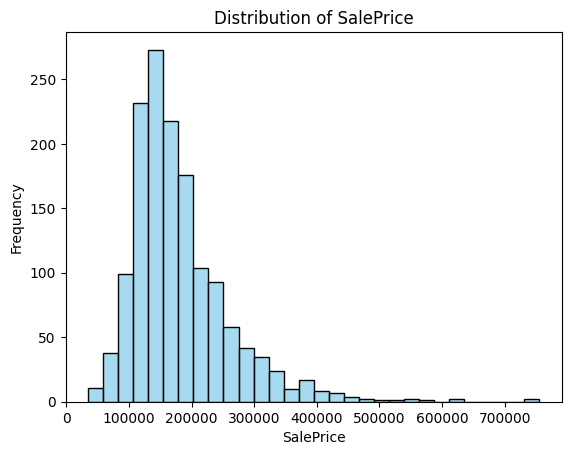

In [31]:
# histogram
sns.histplot(df_clean['SalePrice'], kde=False, bins=30, color='skyblue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show();

#### Ccomment
- right-skewed

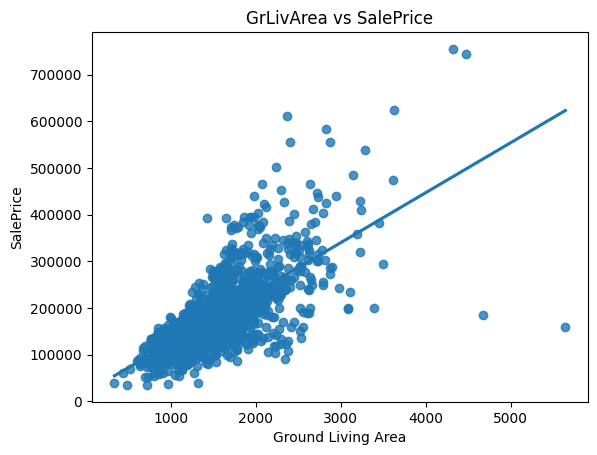

In [32]:
# scatter
sns.regplot(data=df_clean, x='GrLivArea', y='SalePrice', ci=None)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Ground Living Area')
plt.ylabel('SalePrice')
plt.show();

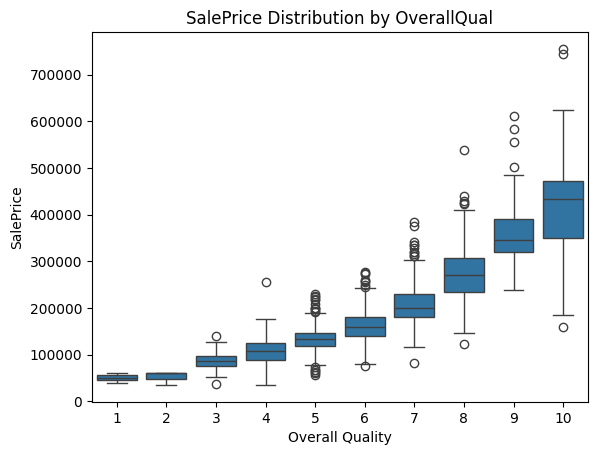

In [33]:
# boxplot
sns.boxplot(data=df_clean, x='OverallQual', y='SalePrice')
plt.title('SalePrice Distribution by OverallQual')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show();

In [34]:
# top 5 correlated features with SalePrice
top_5_cols = list(top_10_pos.head(5).keys()) + ['SalePrice']
top_5_features=df_clean[top_5_cols]
top_5_features

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,SalePrice
0,7,1710,2,548,856,208500
1,6,1262,2,460,1262,181500
2,7,1786,2,608,920,223500
3,7,1717,3,642,756,140000
4,8,2198,3,836,1145,250000
...,...,...,...,...,...,...
1455,6,1647,2,460,953,175000
1456,6,2073,2,500,1542,210000
1457,7,2340,1,252,1152,266500
1458,5,1078,1,240,1078,142125


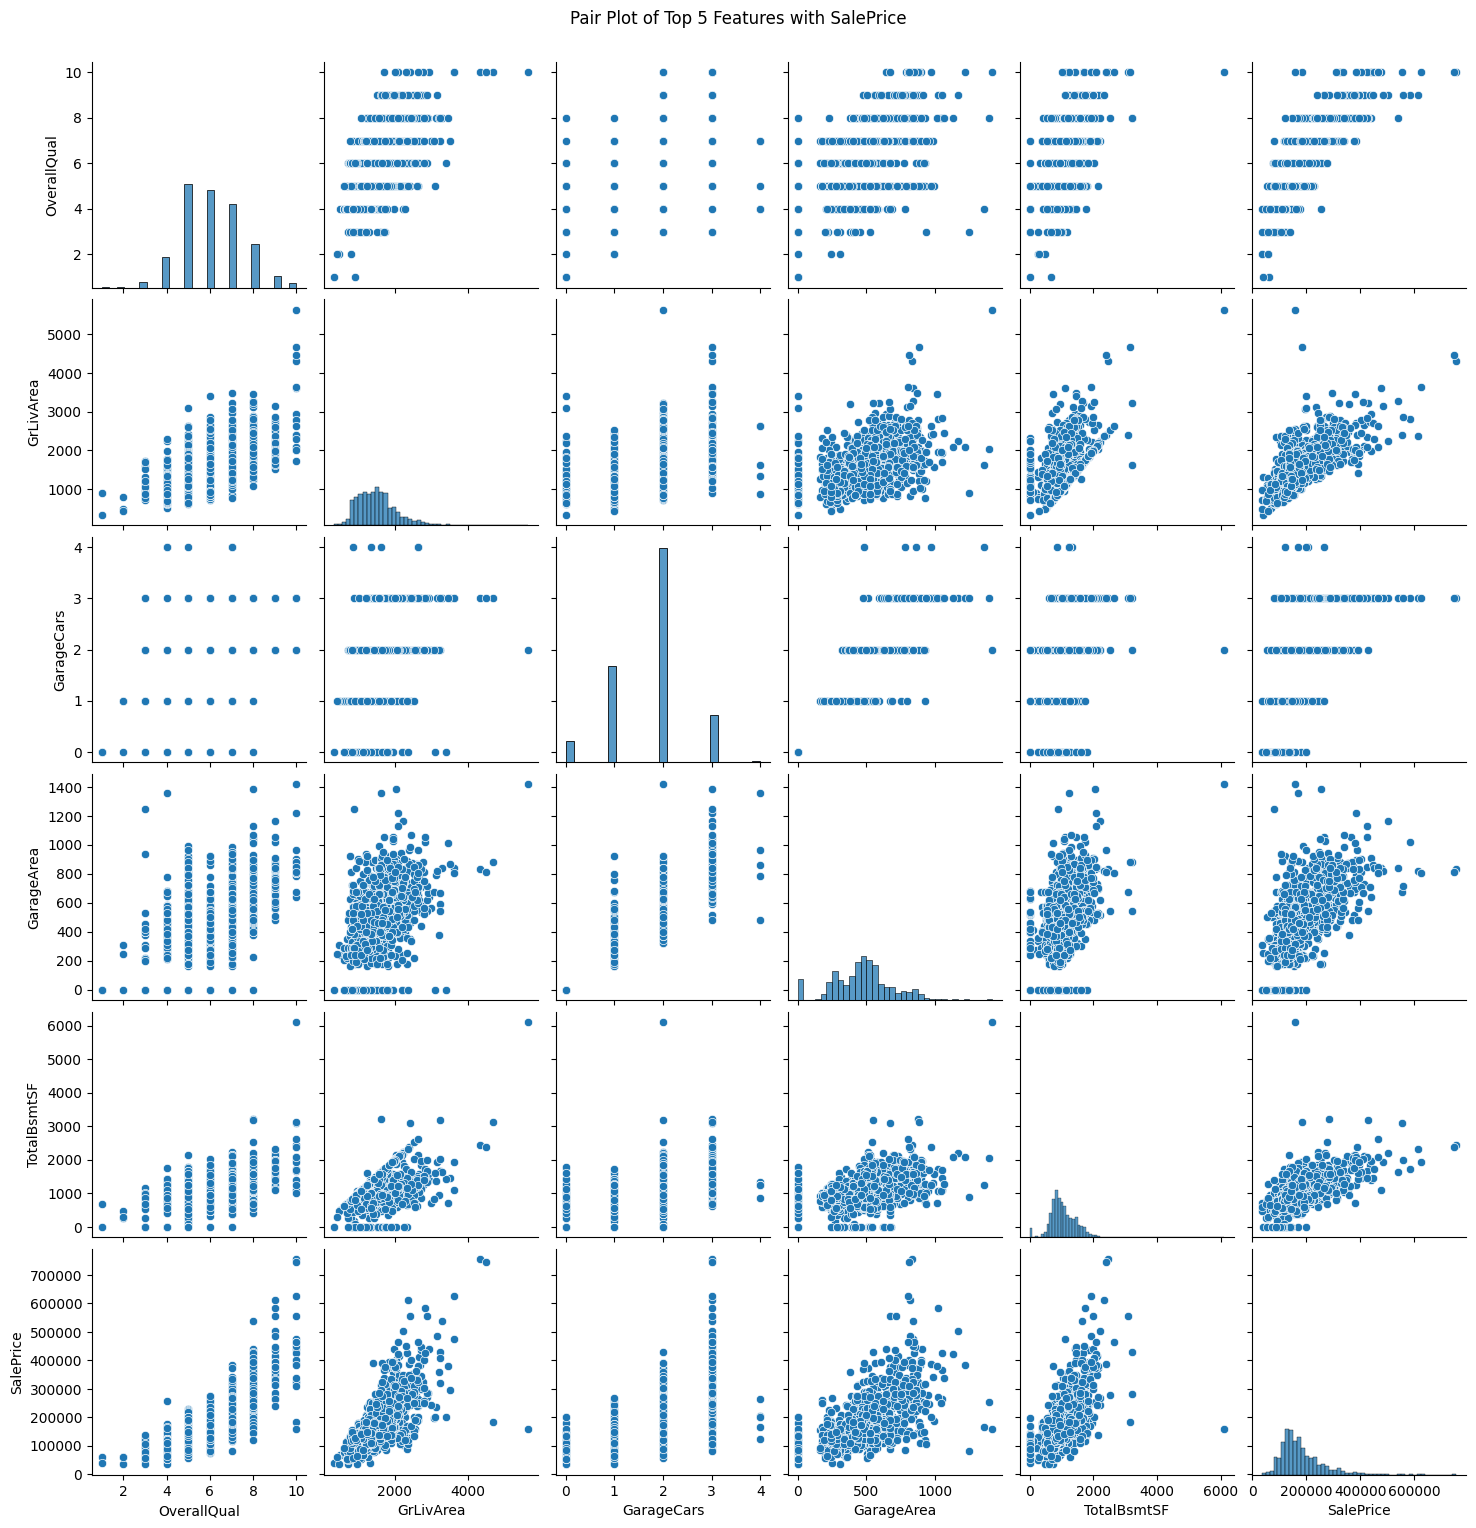

In [35]:
# create pair plot
sns.pairplot(top_5_features, vars=top_5_cols)
plt.suptitle('Pair Plot of Top 5 Features with SalePrice', y=1.02)
plt.show();

#### interpretation
- Positive linear trends with SalePrice for features OverallQual, GrLivArea, GarageCars, GarageArea
- Outliers are visible e.g. in GrLivArea

### 5. Advanced Visualization and Insights (10 Marks)
- Create a heatmap of the correlation matrix, highlighting correlations above 0.5 and below -0.5. Comment on any surprising or noteworthy correlations.
- Use a violin plot to compare the distribution of SalePrice across different YearBuilt bins (e.g., before 1950, 1950-2000, and after 2000). Discuss any trends you observe.
- Create a bar plot showing the mean SalePrice for the top 10 most common Exterior1st (primary exterior covering) materials. Provide an interpretation of this plot.

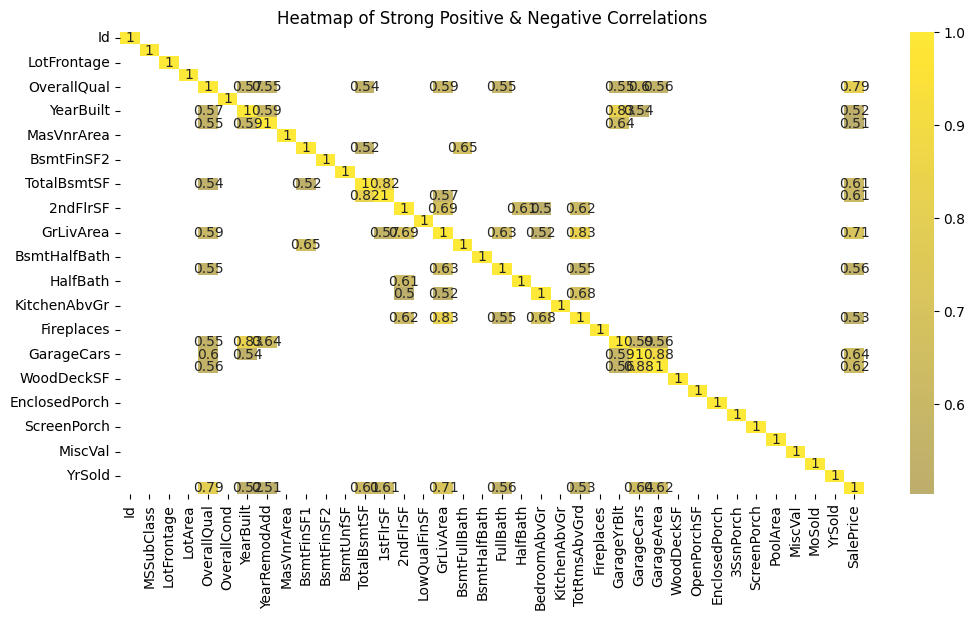

In [36]:
# correlation matrix for numerical columns
corr_matrix = df_num.corr()

# correlations above 0.5 or below -0.5
strong_corr = (corr_matrix > 0.5) | (corr_matrix < -0.5)

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, mask=~strong_corr, annot=True, cmap='cividis', center=0)
plt.title('Heatmap of Strong Positive & Negative Correlations')
plt.show();

#### comment
- verallQual, GrLivArea, GarageCars have strong positive correlation with saleprice

In [37]:
# create bins
bins = [0, 1950, 2000, df_clean['YearBuilt'].max()]
labels = ['Before 1950', '1950-2000', 'After 2000']
df_clean['YearBuilt_Bin'] = pd.cut(df_clean['YearBuilt'], bins=bins, labels=labels)
df_clean.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YearBuilt_Bin
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,1,0,After 2000
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,1,0,1950-2000
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,1,0,After 2000
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,0,0,0,0,0,Before 1950
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,1,0,1950-2000


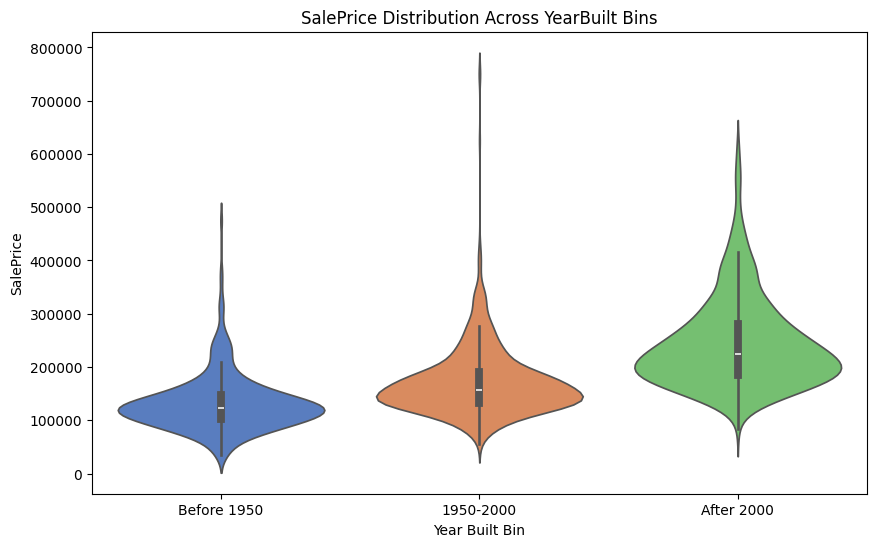

In [38]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df_clean, x='YearBuilt_Bin', y='SalePrice', palette='muted', hue='YearBuilt_Bin', legend=False)
plt.title('SalePrice Distribution Across YearBuilt Bins')
plt.xlabel('Year Built Bin')
plt.ylabel('SalePrice')
plt.show();

#### Comment
- Houses built after 2000 have higher median saleprice whereas before 1950 houses had lower prices

In [39]:
# top 10 exterior1st categories by frequency
top_exteriors = df_clean['Exterior1st'].value_counts().nlargest(10).index
top_exteriors

Index([12, 6, 8, 13, 9, 5, 3, 14, 11, 0], dtype='int32', name='Exterior1st')

In [40]:
# filter
df_top_exteriors = df_clean[df_clean['Exterior1st'].isin(top_exteriors)]
df_top_exteriors.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YearBuilt_Bin
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,1,0,After 2000
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,1,0,1950-2000
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,1,0,After 2000
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,0,0,0,0,0,Before 1950
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,1,0,1950-2000


In [41]:
# calculate mean SalePrice
mean_prices = df_top_exteriors.groupby('Exterior1st')['SalePrice'].mean().sort_values(ascending=False)
mean_prices

Exterior1st
5     231690.655738
12    213732.900971
3     194573.000000
9     175942.379630
6     163077.450450
11    162990.000000
14    150655.076923
13    149841.645631
8     149422.177273
0     107385.550000
Name: SalePrice, dtype: float64

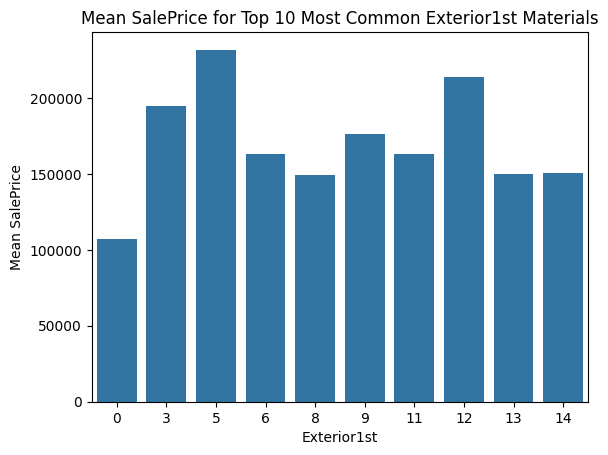

In [42]:
# barplot
sns.barplot(x=mean_prices.index, y=mean_prices.values)
plt.title('Mean SalePrice for Top 10 Most Common Exterior1st Materials')
plt.ylabel('Mean SalePrice')
plt.show();

#### interpretation
- Exterior1st such as 3, 5 and 12 have higher mean SalePrice